# **Exercícios**

### ***Importação de pacotes***

In [84]:
# pandas
import pandas as pd

# numpy
import numpy as np

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

### ***Criação de um dataframe com base no arquivo .csv***

In [2]:
# Link para o conjunto de dados: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

dados = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)

### ***Análise Exploratória***

In [3]:
print(f'O dataframe possui {dados.shape[0]} registros (linhas) e {dados.shape[1]} atributos (colunas)')

O dataframe possui 2075259 registros (linhas) e 9 atributos (colunas)


In [4]:
dados.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
dados.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


## 1. Carregue o dataset e exiba as 10 primeiras linhas.

In [7]:
dados.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

R: Global_active_power (kW) → é a potência ativa, ou seja, a parte da energia elétrica que efetivamente é transformada em trabalho útil: calor, luz, movimento, etc. É o que aparece na sua conta de energia.
Exemplo: quando você liga o micro-ondas, a potência ativa é a energia que esquenta a comida.

Global_reactive_power (kVAR) → é a potência reativa, ligada a campos magnéticos e elétricos de certos aparelhos (motores, transformadores, lâmpadas fluorescentes). Essa energia não é consumida de fato: ela “vai e volta” entre a casa e a rede elétrica, necessária para manter o funcionamento de alguns equipamentos.

Exemplo: o motor da geladeira precisa desse componente reativo para criar o campo magnético que faz o motor girar, mas isso não vira “trabalho útil”.

## 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [8]:
# Substitui os "?" por NaN
dados = dados.replace("?", np.nan)

In [9]:
faltantes = dados.isna().sum()
perc = (faltantes / dados.shape[0]) * 100

In [10]:
print(faltantes)
print(perc)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


## 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [11]:
dados['Date'] = pd.to_datetime(dados['Date'], dayfirst=True)

dados['Dia_da_Semana'] = dados['Date'].dt.dayofweek

dados[['Date', 'Dia_da_Semana']].head()

,Date,Dia_da_Semana
0,2006-12-16,5
1,2006-12-16,5
2,2006-12-16,5
3,2006-12-16,5
4,2006-12-16,5


In [12]:
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_da_Semana
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,5
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,5
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,5
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,5
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,5


## 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [13]:
cols_num = ['Global_active_power', 'Global_reactive_power',
            'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

dados[cols_num] = dados[cols_num].apply(pd.to_numeric, errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Dia_da_Semana          int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 150.4+ MB


## 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

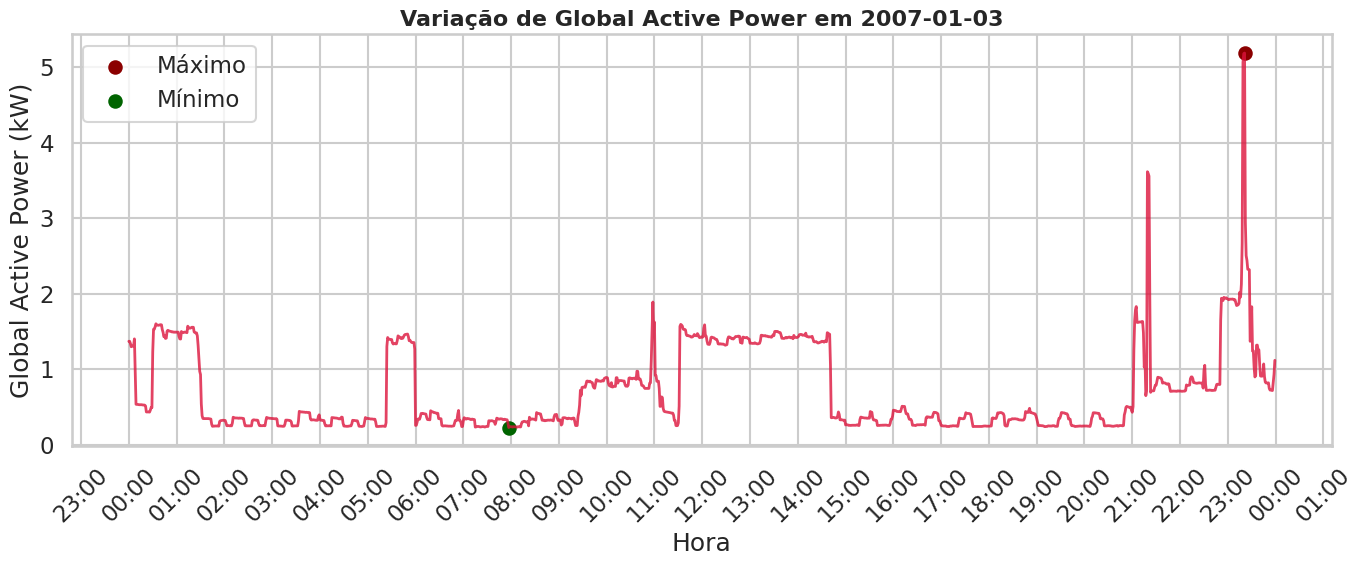

In [14]:
dia_escolhido = '2007-01-03'
dados_dia = dados[dados['Date'].dt.date == pd.to_datetime(dia_escolhido).date()]

dados_dia = dados[dados['Date'].dt.date == pd.to_datetime(dia_escolhido).date()].copy()
dados_dia['DateTime'] = pd.to_datetime(dados_dia['Date'].dt.strftime('%Y-%m-%d') + ' ' + dados_dia['Time'])

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(14,6))

plt.plot(dados_dia['DateTime'], dados_dia['Global_active_power'],
         color='crimson', linewidth=2, alpha=0.8)

max_idx = dados_dia['Global_active_power'].idxmax()
min_idx = dados_dia['Global_active_power'].idxmin()
plt.scatter(dados_dia.loc[max_idx, 'DateTime'], dados_dia.loc[max_idx, 'Global_active_power'],
            color='darkred', s=80, label='Máximo')
plt.scatter(dados_dia.loc[min_idx, 'DateTime'], dados_dia.loc[min_idx, 'Global_active_power'],
            color='darkgreen', s=80, label='Mínimo')

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title(f'Variação de Global Active Power em {dia_escolhido}', fontsize=16, weight='bold')
plt.xlabel('Hora')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

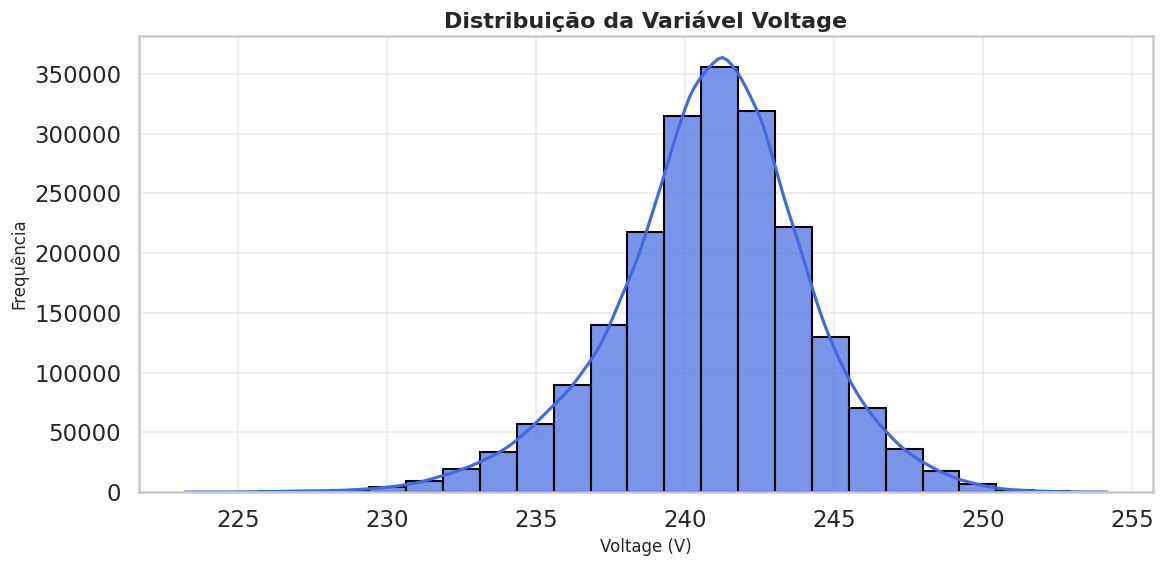

In [15]:
plt.figure(figsize=(12,6))

sns.histplot(dados['Voltage'], bins=25, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

plt.title('Distribuição da Variável Voltage', fontsize=16, weight='bold')
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [16]:
dados['DateTime'] = pd.to_datetime(dados['Date'].dt.strftime('%Y-%m-%d') + ' ' + dados['Time'])
dados['Ano'] = dados['DateTime'].dt.year
dados['Mes'] = dados['DateTime'].dt.month

consumo_medio_por_mes = dados.groupby(['Ano', 'Mes'])['Global_active_power'].mean().reset_index()
consumo_medio_por_mes.rename(columns={'Global_active_power':'Consumo_medio_kW'}, inplace=True)
consumo_medio_por_mes.head(10)

,Ano,Mes,Consumo_medio_kW
0,2006,12,1.901295
1,2007,1,1.546034
2,2007,2,1.401084
3,2007,3,1.318627
4,2007,4,0.891189
5,2007,5,0.985862
6,2007,6,0.826814
7,2007,7,0.667367
8,2007,8,0.764186
9,2007,9,0.969318


## 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [17]:
dados['Dia'] = dados['DateTime'].dt.date

consumo_diario = dados.groupby('Dia')['Global_active_power'].sum().reset_index()

dia_maior_consumo = consumo_diario.loc[consumo_diario['Global_active_power'].idxmax()]

In [18]:
print(f"Dia com maior consumo: {dia_maior_consumo['Dia']} | Consumo total: {dia_maior_consumo['Global_active_power']:.2f} kW")

Dia com maior consumo: 2006-12-23 | Consumo total: 4773.39 kW


## 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [19]:
dados['Tipo_dia'] = dados['DateTime'].dt.dayofweek.apply(lambda x: 'Fim de semana' if x >= 5 else 'Dia de semana')

consumo_tipo_dia = dados.groupby('Tipo_dia')['Global_active_power'].mean().reset_index()

consumo_tipo_dia

,Tipo_dia,Global_active_power
0,Dia de semana,1.035472
1,Fim de semana,1.234232


## 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [20]:
correlacoes = dados[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
correlacoes

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [21]:
dados['Total_Sub_metering'] = dados['Sub_metering_1'] + dados['Sub_metering_2'] + dados['Sub_metering_3']
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_da_Semana,DateTime,Ano,Mes,Dia,Tipo_dia,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,2006-12-16 17:24:00,2006,12,2006-12-16,Fim de semana,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,2006-12-16 17:25:00,2006,12,2006-12-16,Fim de semana,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,2006-12-16 17:26:00,2006,12,2006-12-16,Fim de semana,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,2006-12-16 17:27:00,2006,12,2006-12-16,Fim de semana,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,2006-12-16 17:28:00,2006,12,2006-12-16,Fim de semana,18.0


## 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [22]:
# Média de Global_active_power
media_global = dados['Global_active_power'].mean()

# Média mensal de Total_Sub_metering
media_mensal_sub = dados.groupby([dados['DateTime'].dt.year, dados['DateTime'].dt.month])['Total_Sub_metering'].mean()

# Filtrar meses acima da média global
meses_acima_media = media_mensal_sub[media_mensal_sub > media_global]

In [23]:
if not meses_acima_media.empty:
    print("Mês(es) em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print()
    print(meses_acima_media)
    print()
    print("Média de Global_active_power:", media_global)
else:
    print("Nenhum mês ultrapassa a média de Global_active_power.")

Mês(es) em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:

DateTime  DateTime
2006      12          10.873181
2007      1           10.423518
          2            9.486135
          3           10.212863
          4            6.839375
          5            8.452442
          6            7.379151
          7            5.697724
          8            6.979336
          9            8.206236
          10           8.674493
          11           9.819413
          12          11.636551
2008      1            9.786218
          2            8.447829
          3            9.454894
          4            9.574745
          5            9.019468
          6            9.775226
          7            7.145414
          8            2.370223
          9            8.825185
          10           8.592686
          11           9.135445
          12           8.793377
2009      1           10.690405
          2            9.786069
          3            9.896

## 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

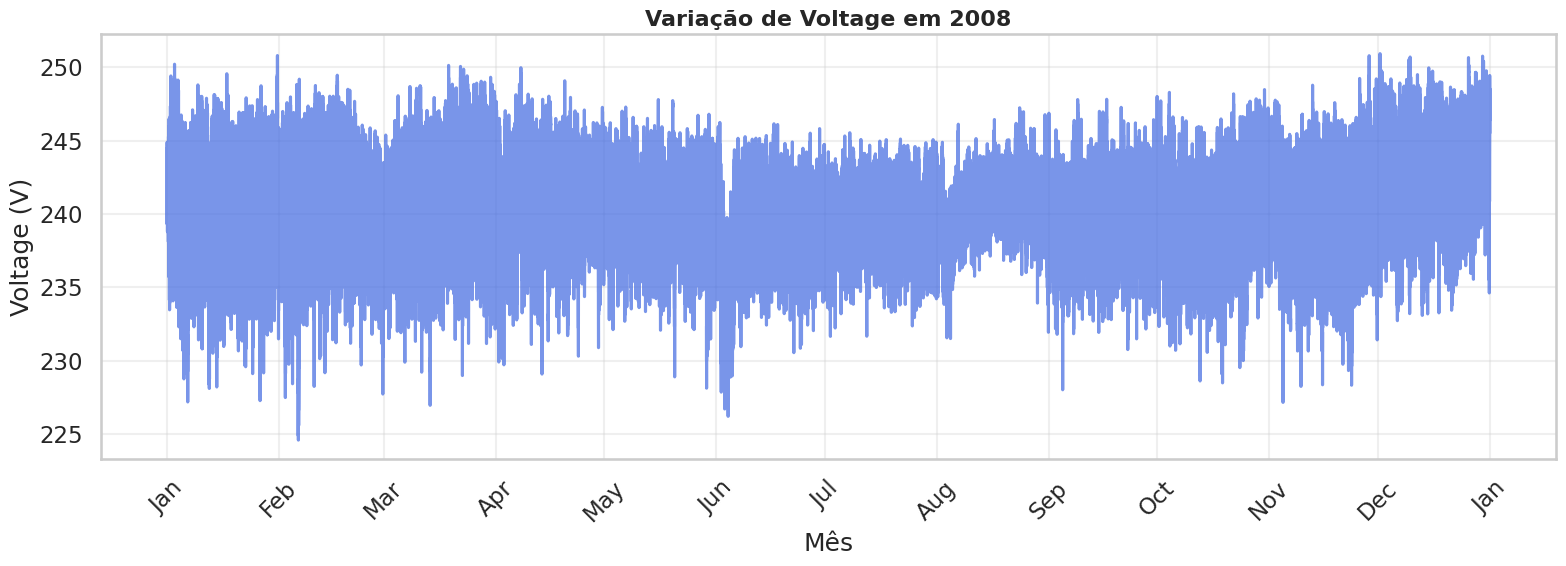

In [24]:
# Filtrar dados de 2008
dados_2008 = dados[dados['DateTime'].dt.year == 2008].copy()

plt.figure(figsize=(16,6))

# Série temporal
plt.plot(dados_2008['DateTime'], dados_2008['Voltage'], color='royalblue', alpha=0.7)

# Formatar eixo x para meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Variação de Voltage em 2008', fontsize=16, weight='bold')
plt.xlabel('Mês')
plt.ylabel('Voltage (V)')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [25]:
def estacao_hemisferio_norte(mes):
    if mes in [12, 1, 2]:
        return 'Inverno'
    elif mes in [6, 7, 8]:
        return 'Verão'
    else:
        return 'Outras estações'

In [27]:
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_da_Semana,DateTime,Ano,Mes,Dia,Tipo_dia,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,2006-12-16 17:24:00,2006,12,2006-12-16,Fim de semana,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,2006-12-16 17:25:00,2006,12,2006-12-16,Fim de semana,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,2006-12-16 17:26:00,2006,12,2006-12-16,Fim de semana,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,2006-12-16 17:27:00,2006,12,2006-12-16,Fim de semana,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,2006-12-16 17:28:00,2006,12,2006-12-16,Fim de semana,18.0


In [29]:
dados['Estacao'] = dados['Mes'].apply(estacao_hemisferio_norte)

consumo_por_estacao = dados.groupby('Estacao')['Global_active_power'].mean().reset_index()
consumo_por_estacao

,Estacao,Global_active_power
0,Inverno,1.417623
1,Outras estações,1.118732
2,Verão,0.726682


## 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

In [30]:
# Amostragem aleatória de 1%
amostra = dados.sample(frac=0.01, random_state=42)

# Estatísticas descritivas
distribuicao_amostra = amostra['Global_active_power'].describe()
distribuicao_completa = dados['Global_active_power'].describe()

print("Distribuição da amostra (1%):")
print(distribuicao_amostra)
print("\nDistribuição da base completa:")
print(distribuicao_completa)

Distribuição da amostra (1%):
count    20486.000000
mean         1.097499
std          1.049284
min          0.078000
25%          0.308000
50%          0.608000
75%          1.542000
max          7.878000
Name: Global_active_power, dtype: float64

Distribuição da base completa:
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64


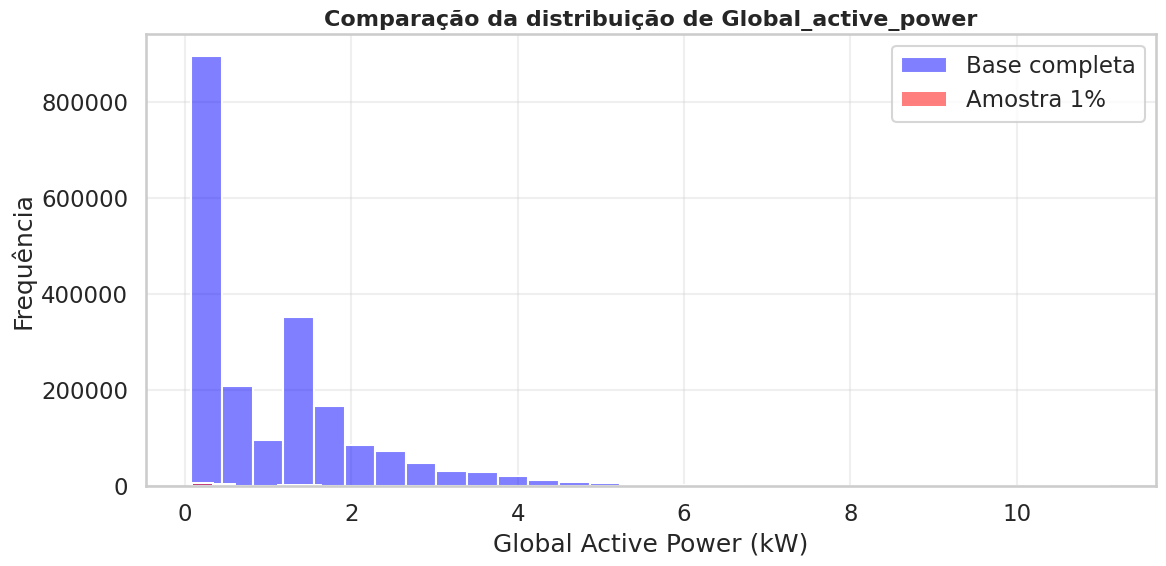

In [31]:
# Comparação visual com histogramas sobrepostos
plt.figure(figsize=(12,6))
sns.histplot(dados['Global_active_power'], bins=30, color='blue', label='Base completa', alpha=0.5)
sns.histplot(amostra['Global_active_power'], bins=30, color='red', label='Amostra 1%', alpha=0.5)
plt.title('Comparação da distribuição de Global_active_power', fontsize=16, weight='bold')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [32]:
variaveis_numericas = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

scaler = MinMaxScaler()

In [33]:
# Aplicar a normalização
dados_normalizados = dados.copy()
dados_normalizados[variaveis_numericas] = scaler.fit_transform(dados_normalizados[variaveis_numericas])

# Verificar resultado
dados_normalizados[variaveis_numericas].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328


## 18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [34]:
dados['Dia'] = dados['DateTime'].dt.date

consumo_diario = dados.groupby('Dia')[['Global_active_power', 'Global_reactive_power',
                                       'Voltage', 'Global_intensity', 'Total_Sub_metering']].mean().reset_index()

In [35]:
variaveis_para_cluster = ['Global_active_power', 'Global_reactive_power',
                          'Voltage', 'Global_intensity', 'Total_Sub_metering']

for col in variaveis_para_cluster:
    consumo_diario[col] = consumo_diario[col].fillna(consumo_diario[col].mean())

In [36]:
scaler = MinMaxScaler()
consumo_diario_scaled = consumo_diario.copy()
consumo_diario_scaled[variaveis_para_cluster] = scaler.fit_transform(consumo_diario_scaled[variaveis_para_cluster])

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
consumo_diario_scaled['Cluster'] = kmeans.fit_predict(consumo_diario_scaled[variaveis_para_cluster])

In [38]:
resumo_clusters = consumo_diario_scaled.groupby('Cluster')[variaveis_para_cluster].mean()
print("Médias das variáveis por cluster:")
print(resumo_clusters)

print("\nQuantidade de dias por cluster:")
print(consumo_diario_scaled['Cluster'].value_counts())

Médias das variáveis por cluster:
         Global_active_power  Global_reactive_power   Voltage  \
Cluster                                                         
0                   0.310549               0.230948  0.616951   
1                   0.156419               0.315536  0.558709   
2                   0.475020               0.365198  0.607622   

         Global_intensity  Total_Sub_metering  
Cluster                                        
0                0.305471            0.396003  
1                0.156960            0.202859  
2                0.469919            0.624421  

Quantidade de dias por cluster:
Cluster
0    699
1    466
2    277
Name: count, dtype: int64


## 19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

In [39]:
inicio = '2007-01-01'
fim = '2007-06-30'
dados_6meses = dados[(dados['DateTime'] >= inicio) & (dados['DateTime'] <= fim)].copy()

In [40]:
dados_6meses.set_index('DateTime', inplace=True)

In [41]:
serie = dados_6meses['Global_active_power'].astype(float).interpolate(method='time')

In [42]:
# Usando frequência diária ('D') se houver muitas medições por hora, podemos ajustar period=24*30 para sazonalidade mensal aproximada
decomposicao = seasonal_decompose(serie, model='additive', period=24*30)

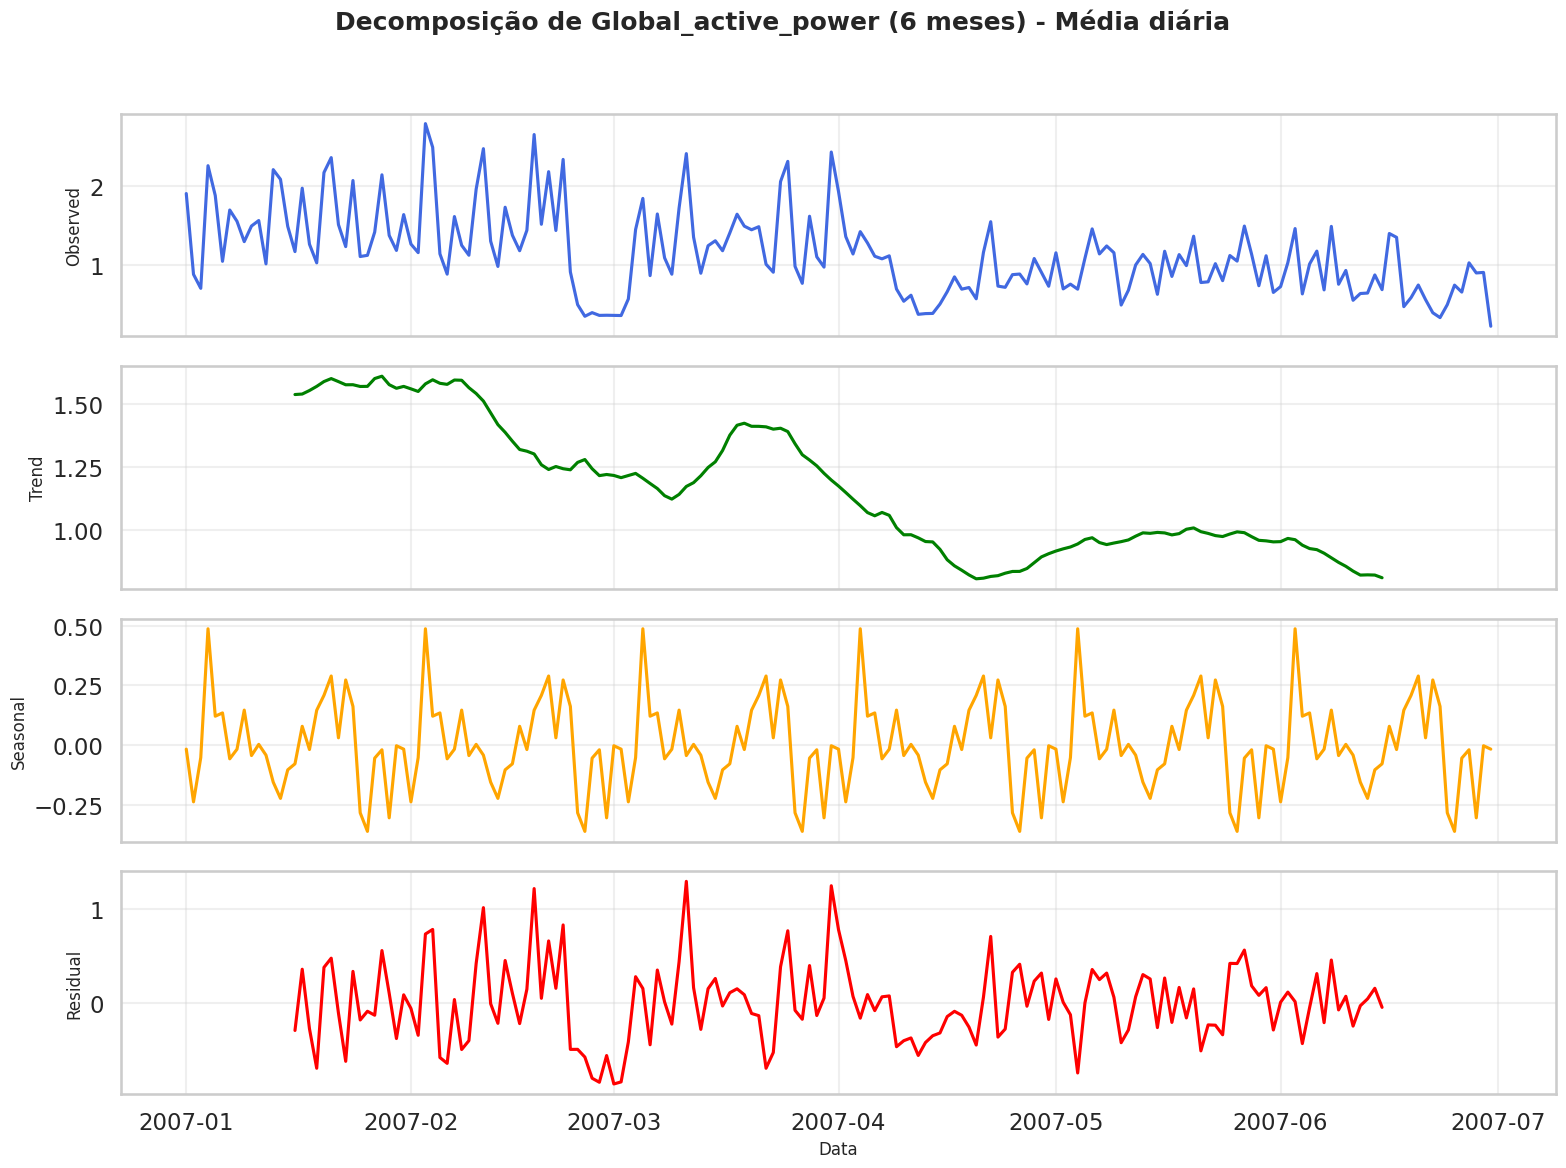

In [43]:
# Agregar por dia
serie_diaria = dados_6meses['Global_active_power'].resample('D').mean().interpolate()

# Decomposição diária
decomposicao_diaria = seasonal_decompose(serie_diaria, model='additive', period=30)  # period ~ 30 dias para sazonalidade mensal

# Plotagem ajustada
fig, axes = plt.subplots(4, 1, figsize=(16,12), sharex=True)
fig.suptitle('Decomposição de Global_active_power (6 meses) - Média diária', fontsize=18, weight='bold')

# Série original
axes[0].plot(decomposicao_diaria.observed, color='royalblue')
axes[0].set_ylabel('Observed', fontsize=12)
axes[0].grid(alpha=0.3)

# Tendência
axes[1].plot(decomposicao_diaria.trend, color='green')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].grid(alpha=0.3)

# Sazonalidade
axes[2].plot(decomposicao_diaria.seasonal, color='orange')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].grid(alpha=0.3)

# Resíduo
axes[3].plot(decomposicao_diaria.resid, color='red')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].set_xlabel('Data', fontsize=12)
axes[3].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo

In [44]:
# Selecionar as variáveis
X = dados[['Global_intensity']].dropna()
y = dados['Global_active_power'].loc[X.index]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = modelo.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente angular (slope): {modelo.coef_[0]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R²: {r2:.4f}")

Coeficiente angular (slope): 0.2376
Intercepto: -0.0081
Mean Squared Error (MSE): 0.0025
R²: 0.9978


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


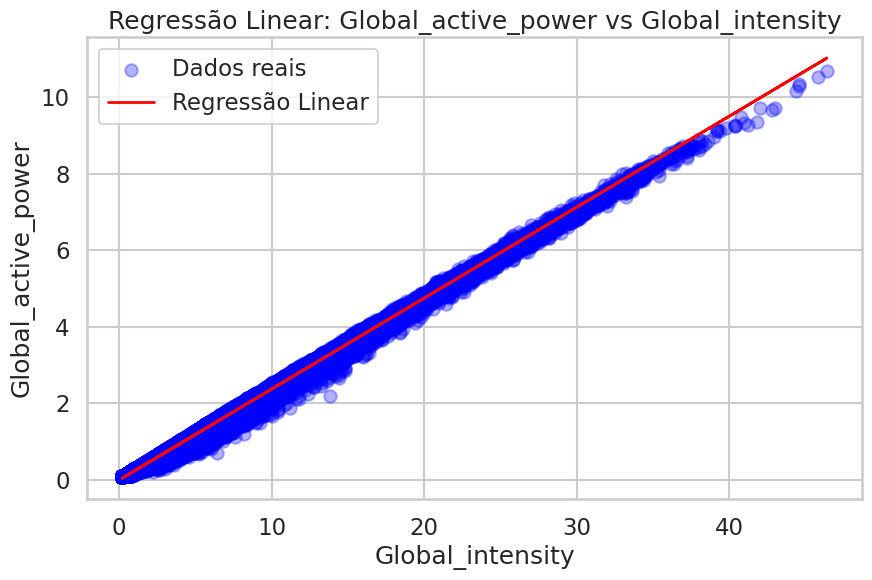

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.3, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear: Global_active_power vs Global_intensity')
plt.legend()
plt.show()

## 21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

In [53]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados['DateTime'] = pd.to_datetime(dados['Date'].dt.strftime('%Y-%m-%d') + ' ' + dados['Time'])
dados.set_index('DateTime', inplace=True)

In [56]:
dados_horarios = dados['Global_active_power'].resample('h').mean()

In [57]:
dados_horarios_por_hora = dados_horarios.groupby(dados_horarios.index.hour).mean()

hora_maior_consumo = dados_horarios_por_hora.idxmax()
hora_menor_consumo = dados_horarios_por_hora.idxmin()

print(f"Hora de maior consumo médio: {hora_maior_consumo}h")
print(f"Hora de menor consumo médio: {hora_menor_consumo}h")

Hora de maior consumo médio: 20h
Hora de menor consumo médio: 4h


## 22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [72]:
lags_1h = dados_horarios.autocorr(lag=1)
lags_24h = dados_horarios.autocorr(lag=24)
lags_48h = dados_horarios.autocorr(lag=48)

print(f"Autocorrelação em lags de 1h: {lags_1h}")
print(f"Autocorrelação em lags de 24h: {lags_24h}")
print(f"Autocorrelação em lags de 48h: {lags_48h}")

Autocorrelação em lags de 1h: 0.7134555946916454
Autocorrelação em lags de 24h: 0.4359072259119912
Autocorrelação em lags de 48h: 0.40126926204501584


/tmp/ipython-input-98320201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lag', y='Autocorrelation', data=df_acf, palette='viridis', edgecolor='k')


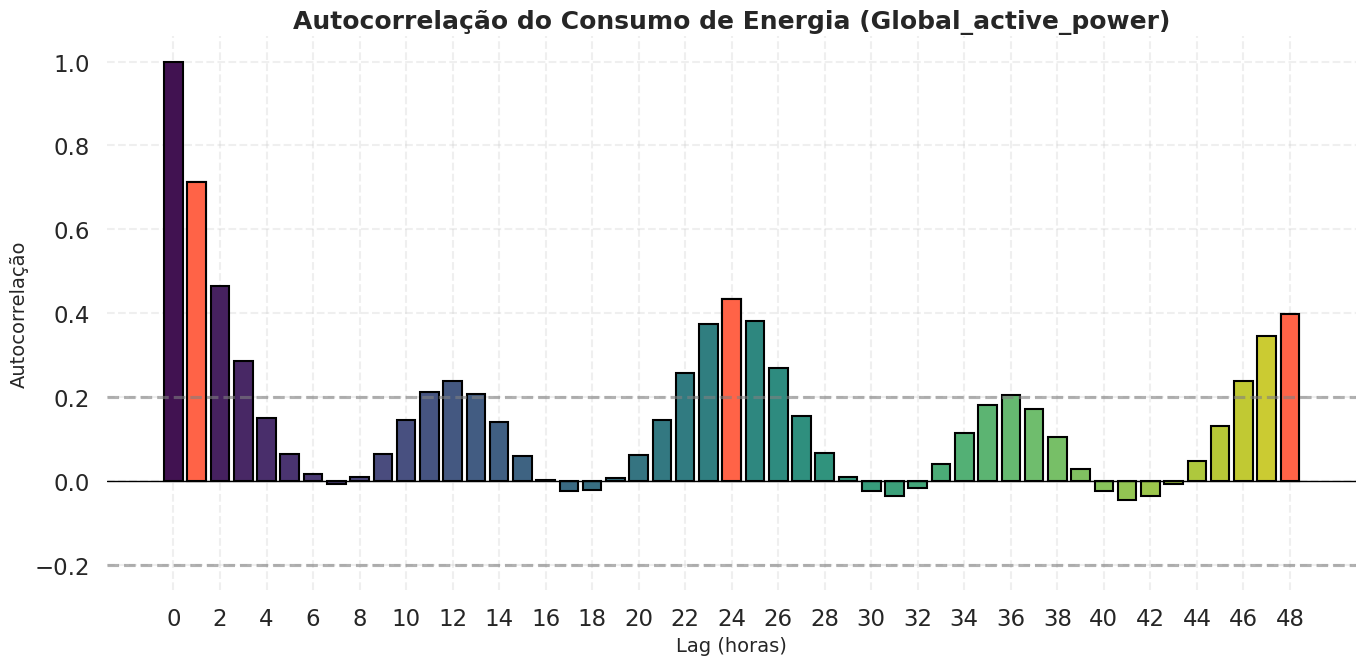

In [73]:
# Pergunta: existem padrões repetidos diariamente?

autocorr_values = acf(dados_horarios.dropna(), nlags=48)

lags = np.arange(len(autocorr_values))
df_acf = pd.DataFrame({'Lag': lags, 'Autocorrelation': autocorr_values})

plt.figure(figsize=(14,7))
sns.barplot(x='Lag', y='Autocorrelation', data=df_acf, palette='viridis', edgecolor='k')

# Destacar lags de interesse (1h, 24h, 48h)
for lag in [1, 24, 48]:
    plt.bar(lag, autocorr_values[lag], color='tomato', edgecolor='k')

plt.axhline(0, color='black', linewidth=1)
plt.axhline(0.2, color='gray', linestyle='--', alpha=0.6)
plt.axhline(-0.2, color='gray', linestyle='--', alpha=0.6)

plt.title('Autocorrelação do Consumo de Energia (Global_active_power)', fontsize=18, weight='bold')
plt.xlabel('Lag (horas)', fontsize=14)
plt.ylabel('Autocorrelação', fontsize=14)
plt.xticks(range(0,49,2))
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## 23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [75]:
# Selecionar variáveis para PCA
variaveis_pca = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
dados_pca = dados[variaveis_pca].dropna()

# Aplicar PCA para 2 componentes
pca = PCA(n_components=2)
dados_pca_reduzido = pca.fit_transform(dados_pca)

# Criar DataFrame com as componentes principais
dados_pca_reduzido_df = pd.DataFrame(dados_pca_reduzido, columns=['PC1', 'PC2'])

In [76]:
print("Variância explicada por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.2%} da variância explicada")

Variância explicada por cada componente principal:
Componente 1: 75.44% da variância explicada
Componente 2: 24.51% da variância explicada


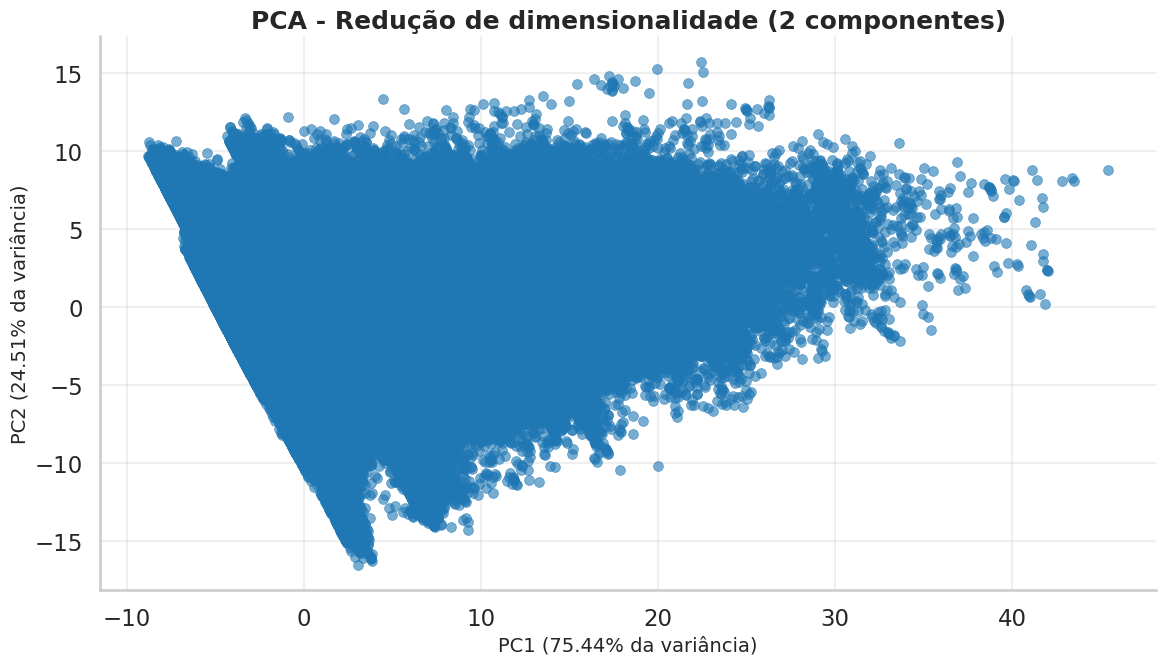

In [77]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    x='PC1',
    y='PC2',
    data=dados_pca_reduzido_df,
    alpha=0.6,
    edgecolor=None,
    s=50,
    color='#1f77b4'
)

plt.title('PCA - Redução de dimensionalidade (2 componentes)', fontsize=18, weight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)', fontsize=14)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## 24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dados_pca_reduzido_df['Cluster'] = kmeans.fit_predict(dados_pca_reduzido_df[['PC1', 'PC2']])

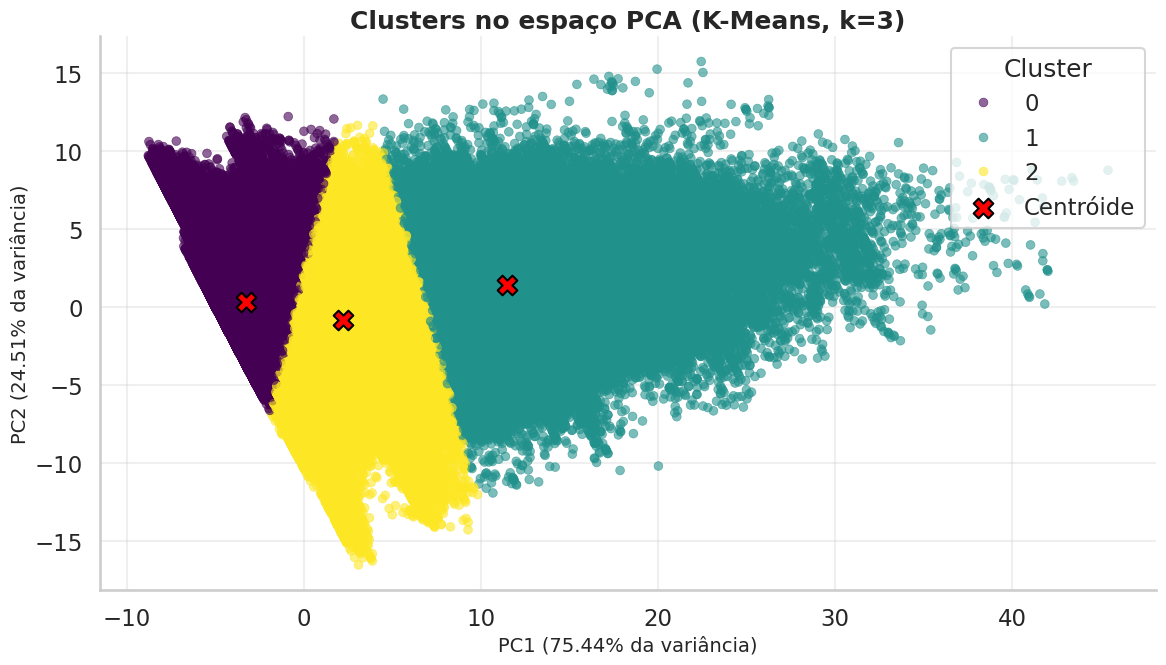

In [79]:
plt.figure(figsize=(12, 7))

# Scatterplot com cores por cluster
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=dados_pca_reduzido_df,
    hue='Cluster',
    palette='viridis',
    alpha=0.6,
    s=40,
    edgecolor=None
)

# Marcar centróides
centroides = kmeans.cluster_centers_
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    s=200,
    c='red',
    marker='X',
    edgecolor='black',
    linewidth=1.5,
    label='Centróide'
)

plt.title('Clusters no espaço PCA (K-Means, k=3)', fontsize=18, weight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [83]:
# Juntar variáveis originais ao DataFrame com clusters
dados_clusters = dados_pca_reduzido_df.join(dados[variaveis_pca].reset_index(drop=True))

print("Quantidade de pontos por cluster:")
print(dados_clusters['Cluster'].value_counts())

print("\nMédias das variáveis originais por cluster (amostra de 50 mil pontos):")
amostra_stats = dados_clusters.sample(n=50_000, random_state=42)
print(amostra_stats.groupby('Cluster')[variaveis_pca].mean())

print("\nDesvio padrão das variáveis originais por cluster (mesma amostra):")
print(amostra_stats.groupby('Cluster')[variaveis_pca].std())

# Calcular Silhouette Score com amostra de até 10 mil pontos
amostra_sil = dados_pca_reduzido_df.sample(n=min(10_000, len(dados_pca_reduzido_df)), random_state=42)
sil_score = silhouette_score(amostra_sil[['PC1', 'PC2']], amostra_sil['Cluster'])
print(f"\nSilhouette Score (amostra): {sil_score:.3f}")

# Interpretação automática
if sil_score > 0.5:
    interpretacao = "Os clusters estão bem separados."
elif sil_score > 0.25:
    interpretacao = "Os clusters apresentam separação moderada."
else:
    interpretacao = "Os clusters não estão claramente separados."
print(f"Interpretação: {interpretacao}")

Quantidade de pontos por cluster:
Cluster
0    1128732
2     737094
1     183454
Name: count, dtype: int64

Médias das variáveis originais por cluster (amostra de 50 mil pontos):
         Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   1.004547               0.124354  241.077519   
1                   1.456470               0.127662  240.802470   
2                   1.135204               0.125702  240.540141   

         Global_intensity  
Cluster                    
0                4.264380  
1                6.160896  
2                4.811123  

Desvio padrão das variáveis originais por cluster (mesma amostra):
         Global_active_power  Global_reactive_power   Voltage  \
Cluster                                                         
0                   0.986417               0.111768  2.997571   
1                   1.413208               0.118284  3.724337   
2                

## 25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [87]:
# Seleção das variáveis
X = dados[['Voltage']].dropna()
y = dados['Global_active_power'].loc[X.index]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [88]:
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

modelo_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [89]:
# Predições
y_pred_linear = modelo_linear.predict(X_test)
y_pred_poly = modelo_poly.predict(X_test)

# RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"RMSE (Regressão Linear): {rmse_linear:.4f}")
print(f"RMSE (Regressão Polinomial): {rmse_poly:.4f}")

# Interpretação automática
if rmse_poly < rmse_linear:
    print("A regressão polinomial apresentou melhor desempenho (menor RMSE).")
elif rmse_poly > rmse_linear:
    print("A regressão linear apresentou melhor desempenho (menor RMSE).")
else:
    print("Ambos os modelos tiveram desempenho equivalente.")

RMSE (Regressão Linear): 0.9708
RMSE (Regressão Polinomial): 0.9664
A regressão polinomial apresentou melhor desempenho (menor RMSE).


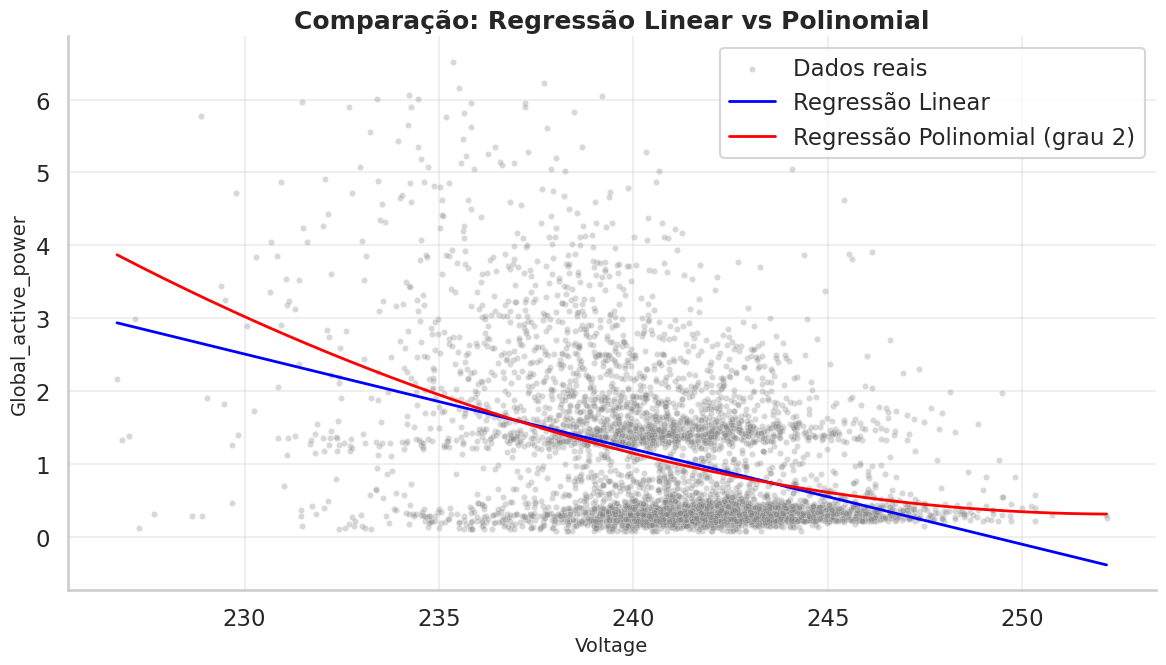

In [91]:
# Amostra para visualização (para não sobrecarregar)
amostra_plot = dados.sample(n=5000, random_state=42).dropna(subset=['Voltage', 'Global_active_power'])

# Geração de pontos para curva (com nomes de coluna)
X_seq = np.linspace(
    amostra_plot['Voltage'].min(),
    amostra_plot['Voltage'].max(),
    300
).reshape(-1, 1)

X_seq_df = pd.DataFrame(X_seq, columns=['Voltage'])

y_seq_linear = modelo_linear.predict(X_seq_df)
y_seq_poly = modelo_poly.predict(X_seq_df)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Voltage', y='Global_active_power',
    data=amostra_plot, alpha=0.3, s=20, color='gray', label='Dados reais'
)

plt.plot(X_seq, y_seq_linear, color='blue', linewidth=2, label='Regressão Linear')
plt.plot(X_seq, y_seq_poly, color='red', linewidth=2, label='Regressão Polinomial (grau 2)')

plt.title('Comparação: Regressão Linear vs Polinomial', fontsize=18, weight='bold')
plt.xlabel('Voltage', fontsize=14)
plt.ylabel('Global_active_power', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()